# Zero to Hero

## 1.03  Construyendo un arbol

Se construye un arbol de decisión, se ven distintas formas de pasar los parámetros y distintas formas de dibujarlo.
<br>
Se muestran funcionalidades básicas de0la libreria  *data.table*

In [1]:
library( "data.table")   #cargo la libreria  data.table
library( "rpart")  #cargo la libreria  rpart

In [2]:
options(repr.plot.width=25, repr.plot.height=25)  #para que los gráficos me salgan legibles

In [3]:
setwd("/Users/pablonavarro/Documents/ITBA/mcd/materias/2023.1.cuatrimestre/mcd_data_mining/mcd_dm/mcd_dm_trabajos") # Establezco el Working Directory

In [4]:
dataset <- fread("./datasets/dataset_pequeno.csv")

Ahora entreno un arbol de decision
<br>
"clase_ternaria ~ ."  significa predecir clase_ternaria utilizando *todo el resto* de las variables del dataset

In [5]:
modelo <-  rpart(  formula= "clase_ternaria ~ ." ,
                   data= dataset[ foto_mes==202107] )

Imprimo el modelo con la muy básica funcion print() de la libreria rpart

In [6]:
print( modelo)

n= 164682 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 164682 2346 CONTINUA (0.006545949 0.007699688 0.985754363) *


Esta impresión no es gráfica. No me sirve.
<br>
a pesar que no me sirve, he encontrado una piedra en el camino, me está generando un arbol con un solo nodo, con solo la raiz

Busco bibliografía y encuentro que existe la libreria  **rpart.plot** que grafica arboles generados con la libreria  *rpart*

In [7]:
library("rpart.plot")

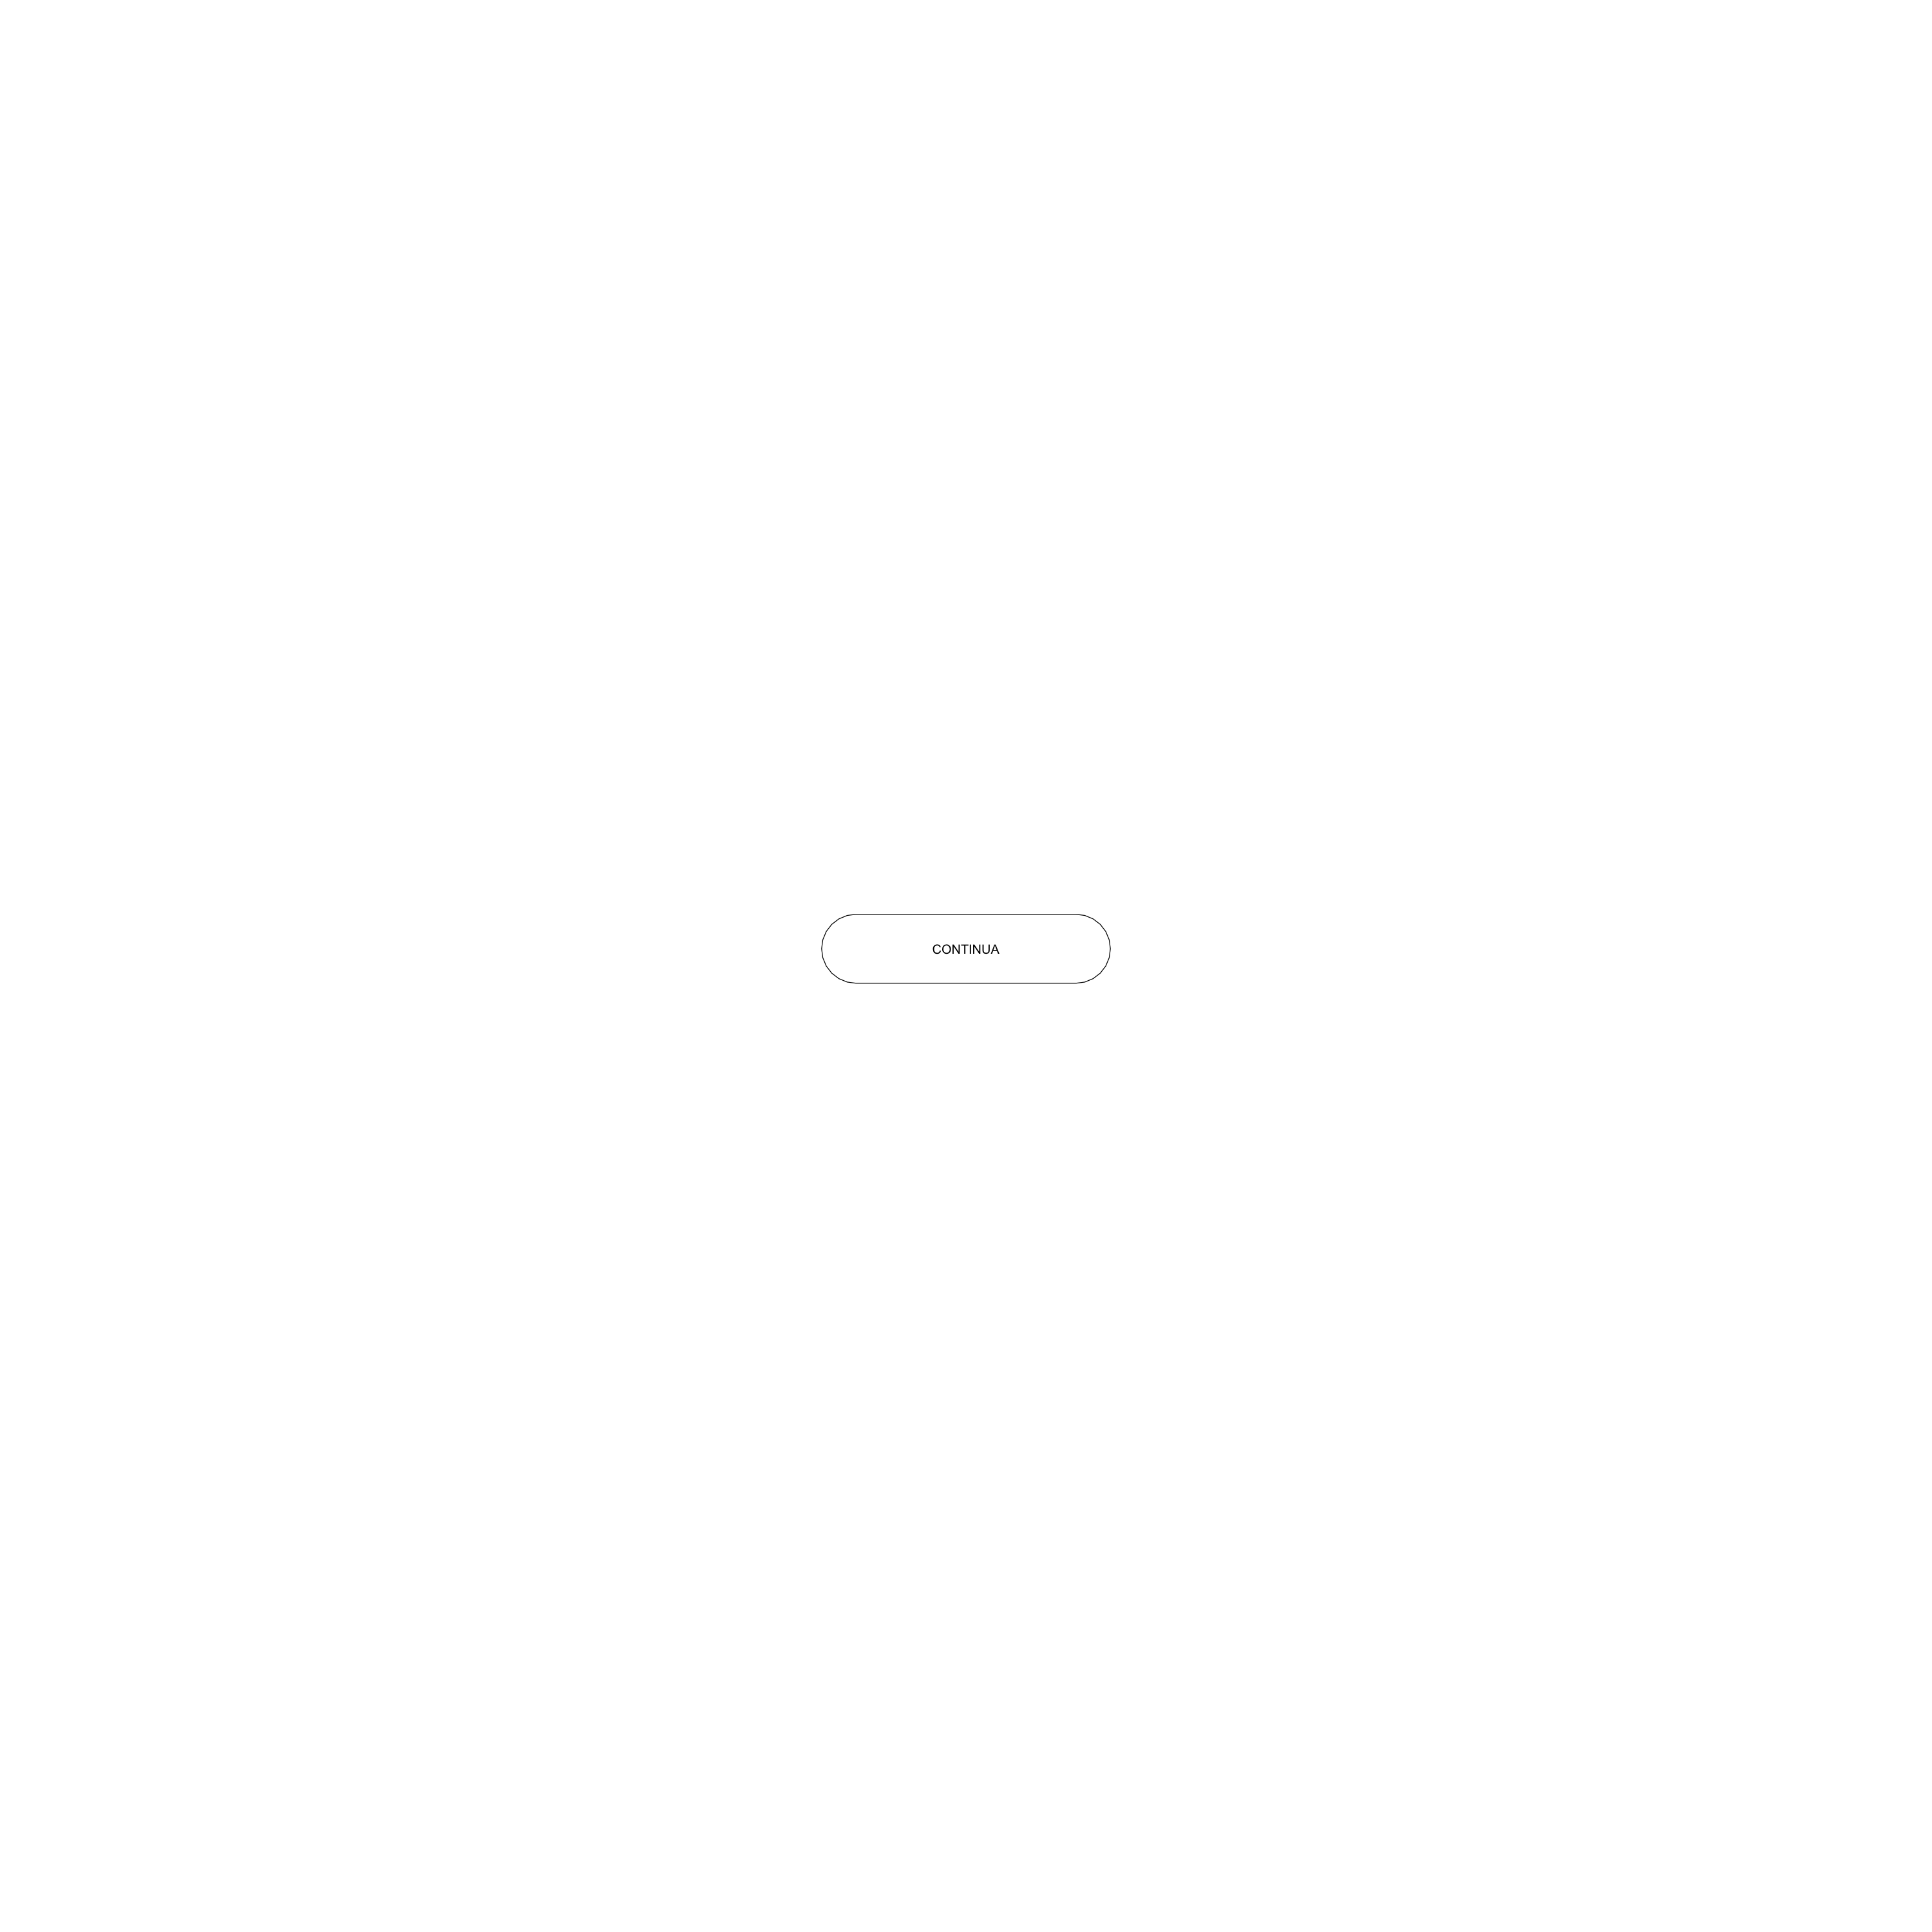

In [8]:
rpart.plot::prp(modelo)

Me ha salido una impresión del arbol, que es un solo nodo, pero solo dice continua.
<br>
leo la documentacion de la librería rpart.plot   https://cran.r-project.org/web/packages/rpart.plot/rpart.plot.pdf

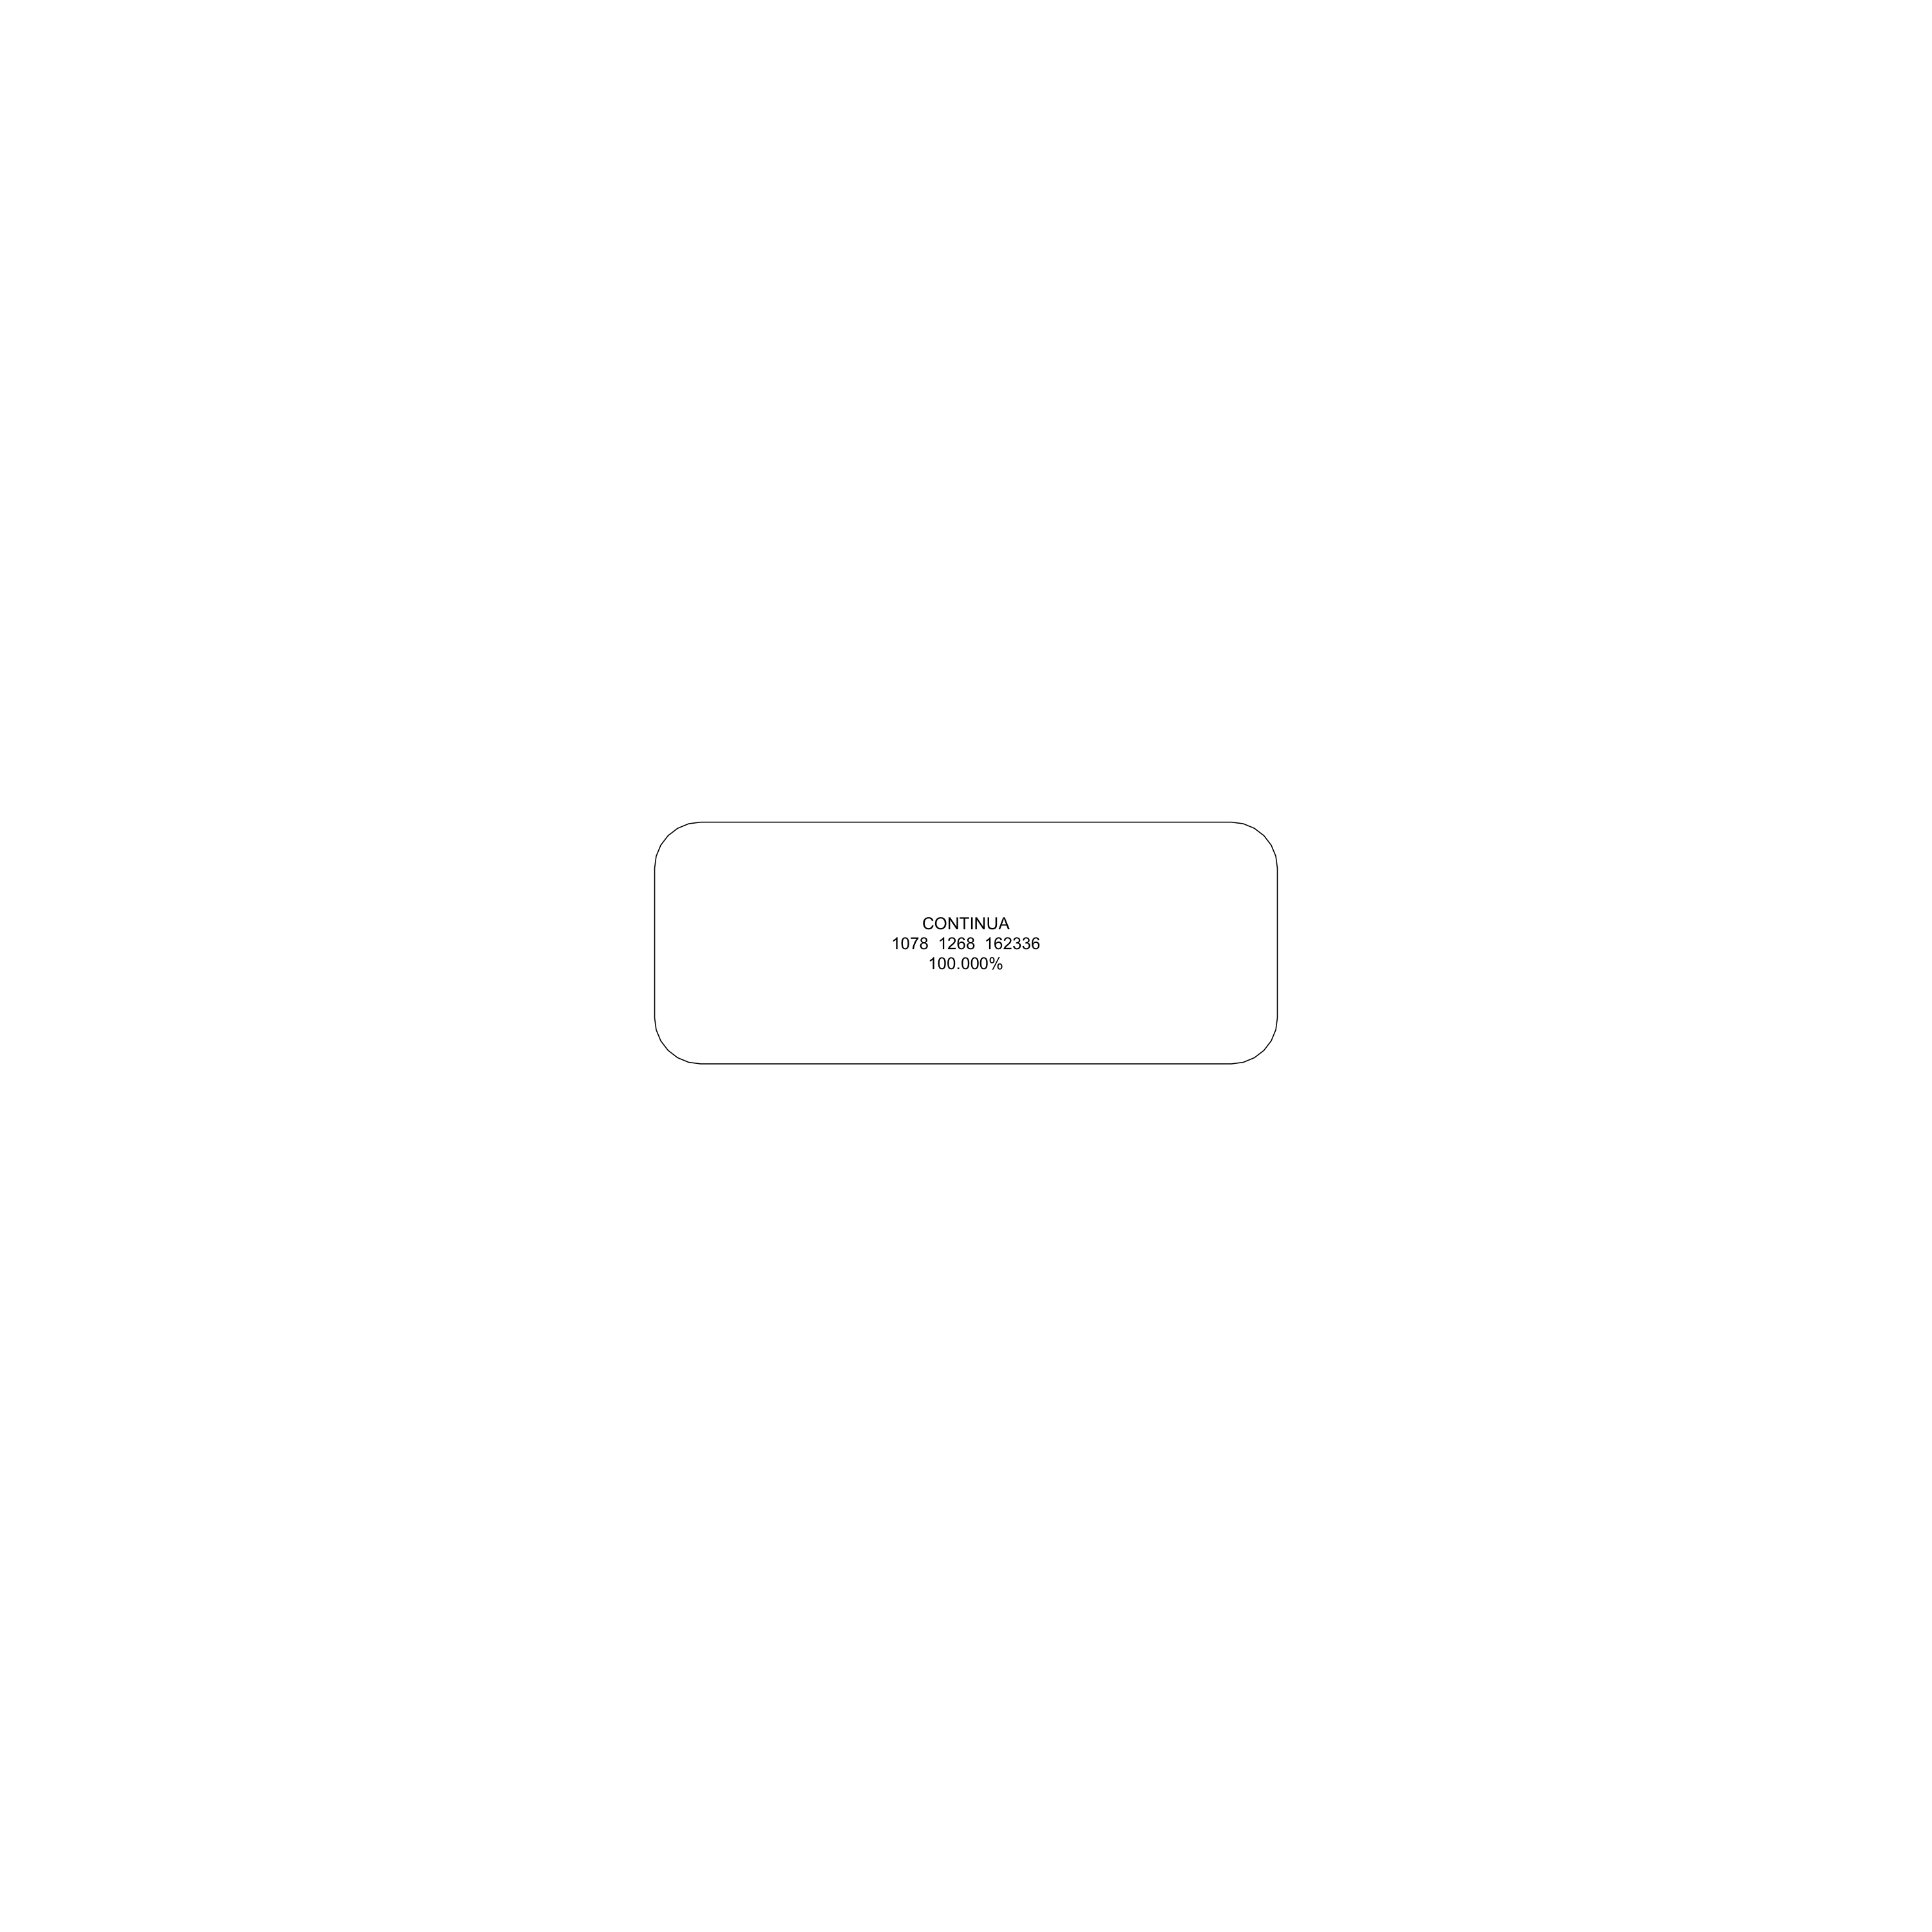

In [9]:
prp(modelo, extra=101, digits=-5, branch=1, type=4, varlen=0, faclen=0, tweak=1.3)

Ha salido solo la raiz del arbol
<br>
Los tres numeros que muestra en el nodo con la cantidad de BAJA+1, BAJA+2 y CONTINUA, en ese orden, alfabetico.
<br>
la cantidad de CONTINUA   la está mostrando en notacion científica

### cambio hiperparámetros del arbol para salga algo mas que un solo nodo

El hiperparámetro cp  *complexity*   limita el split de los nodos.
<br>
El default es  cp=0.05
<br>
Pruebo con cp=0.0  a ver si "se abre el arbol"

Leo la documentación de la libreria rpart  https://cran.r-project.org/web/packages/rpart/rpart.pdf   y veo que existe un hiperparámetro de la funcion rpart  llamado **xval** que es para hacer cross validation, que por default viene seteado en xval=10 .   No me interesa en este momento que haga cross validation, para evitarlo voy a poner  *xval=0*

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"


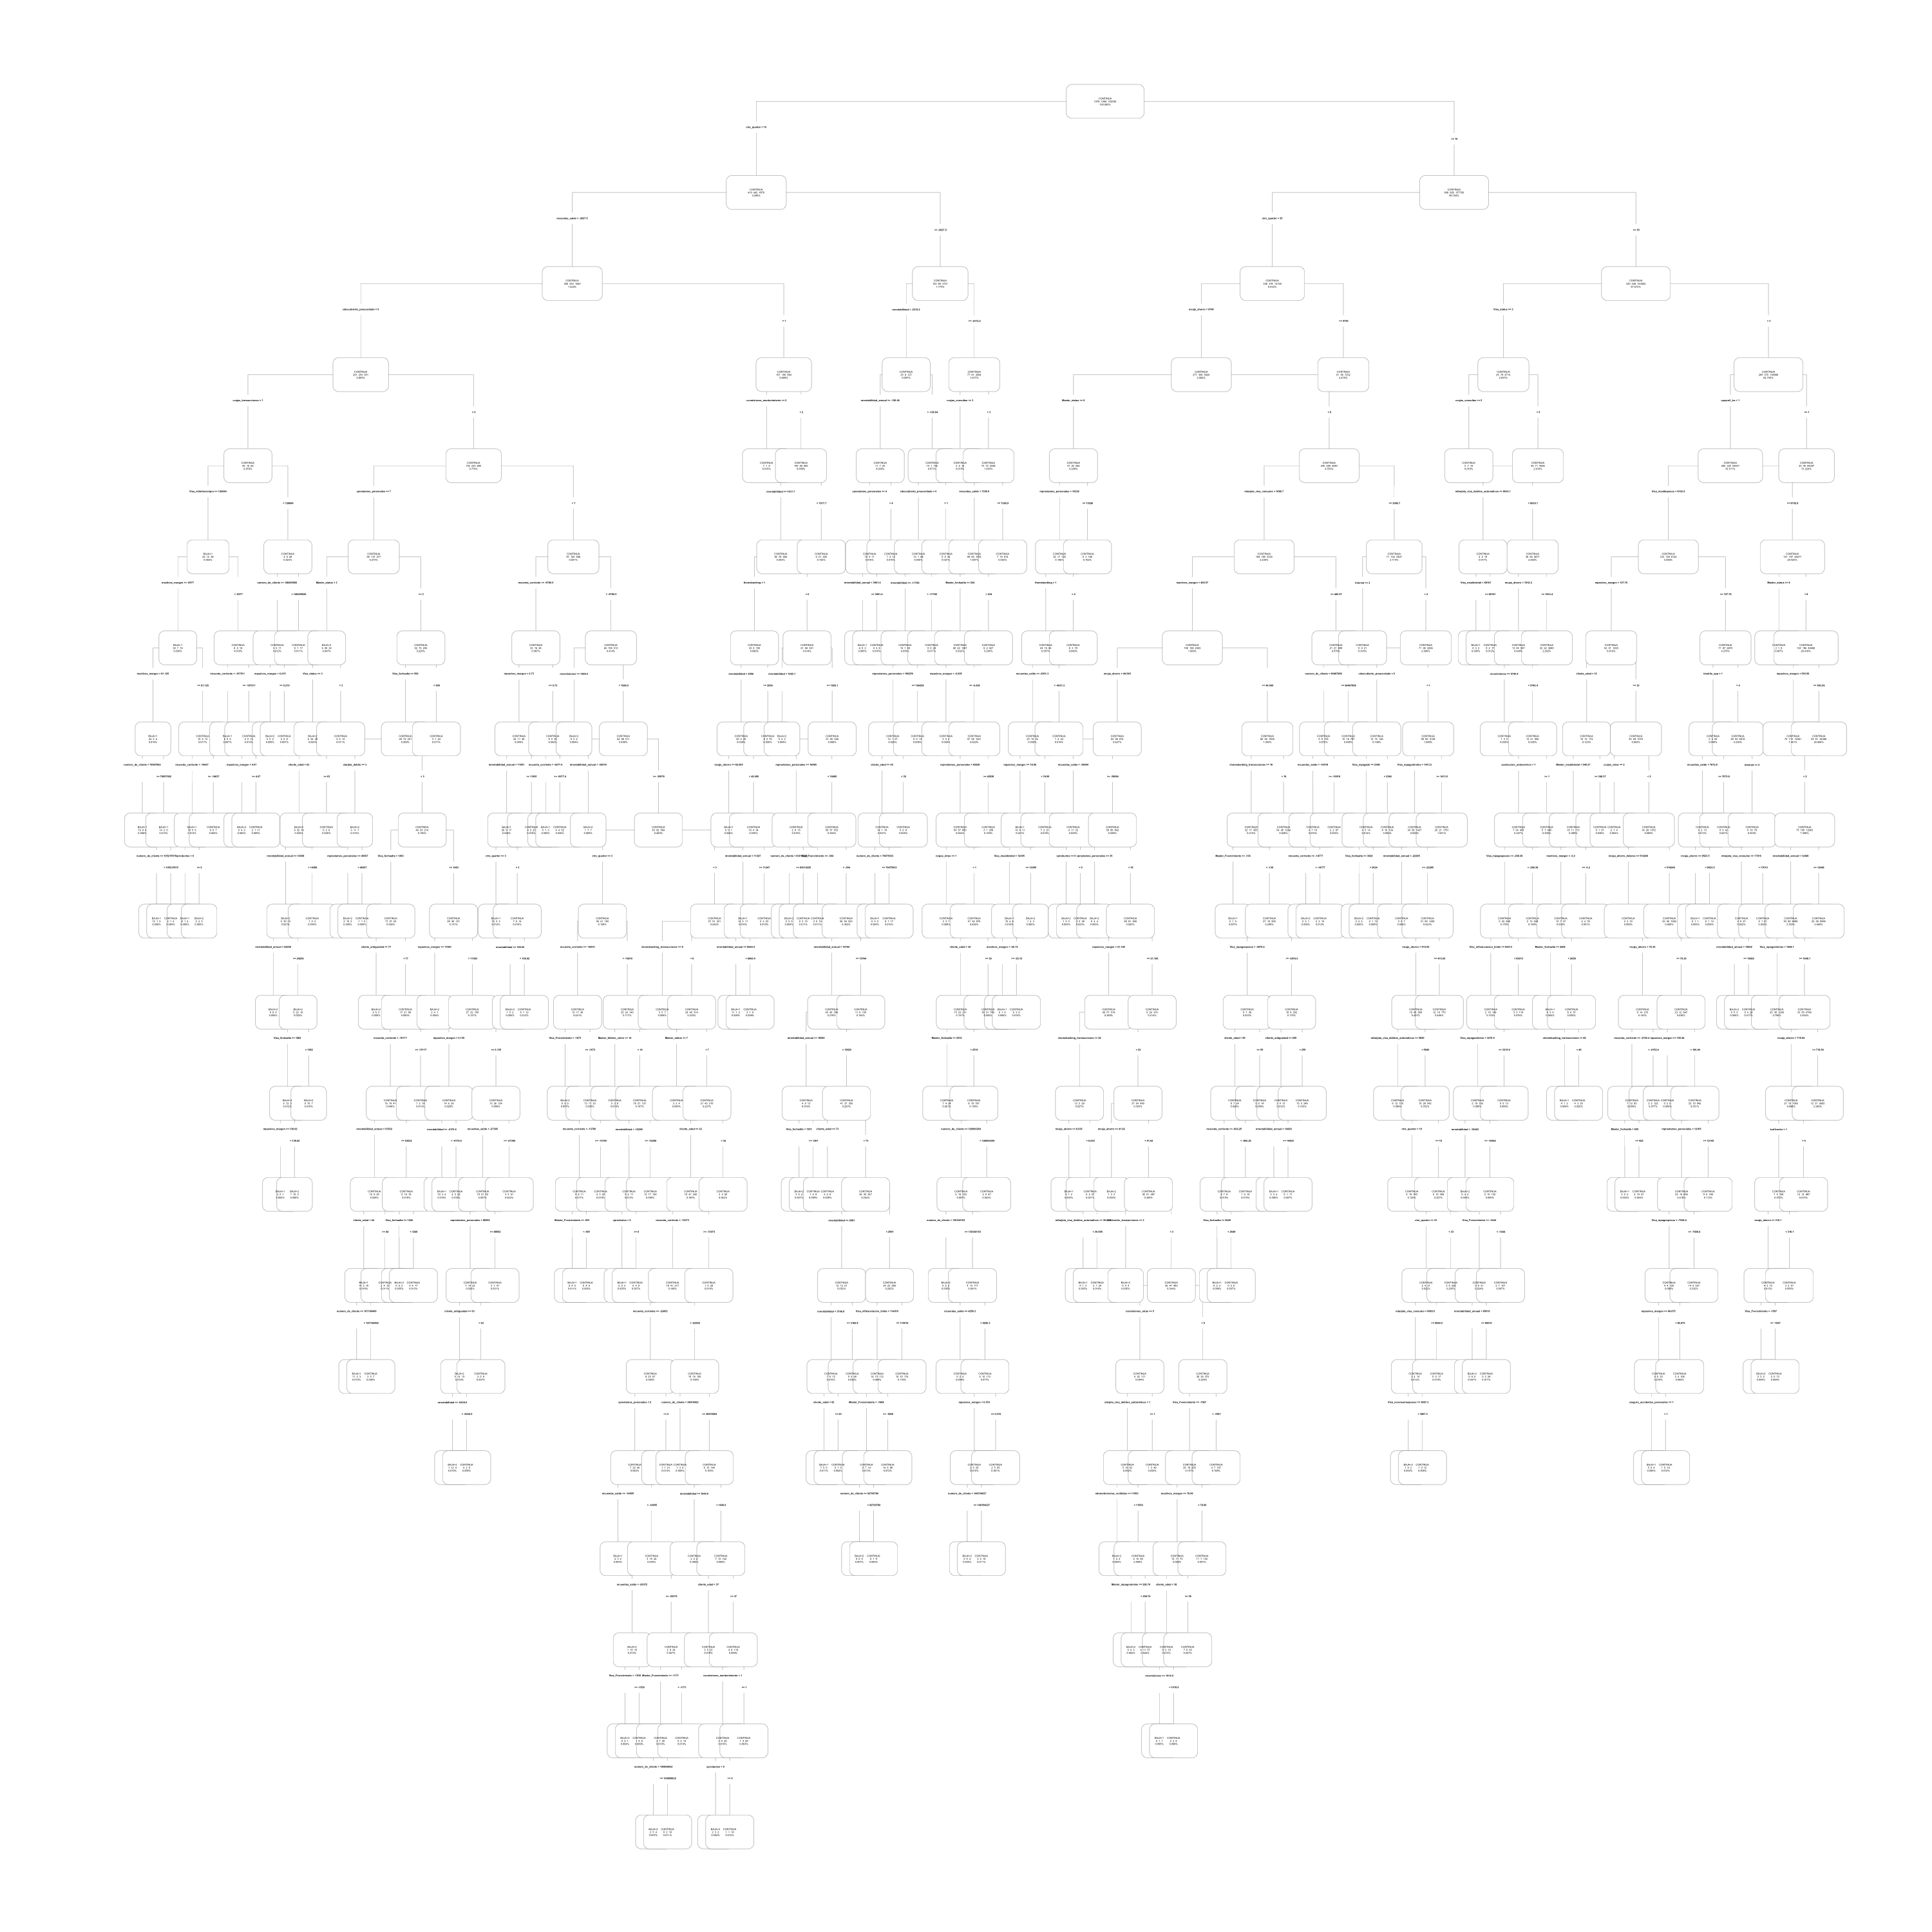

In [10]:
#genero el modelo
modelo <-  rpart(  formula= "clase_ternaria ~ ." ,
                   data= dataset[ foto_mes==202107],
                   xval= 0,
                   cp= 0.0 )

#imprimo el modelo graficamente
prp(modelo, extra=101, digits=-5, branch=1, type=4, varlen=0, faclen=0, tweak=1.3)

sale un arbol de gran profundidad  que ni se puede visualizar
<br>
el mensaje  ""labs do not fit even at cex 0.15, there may be some overplotting"" me dice que no pudo dibujarlo correctamente
<br>
lamentablemente me doy cuenta la libreria rpart.plot es mala
<br>
establezco  maxdepth=2 para poder apreciarlo

Warning message:
"cex and tweak both specified, applying both"


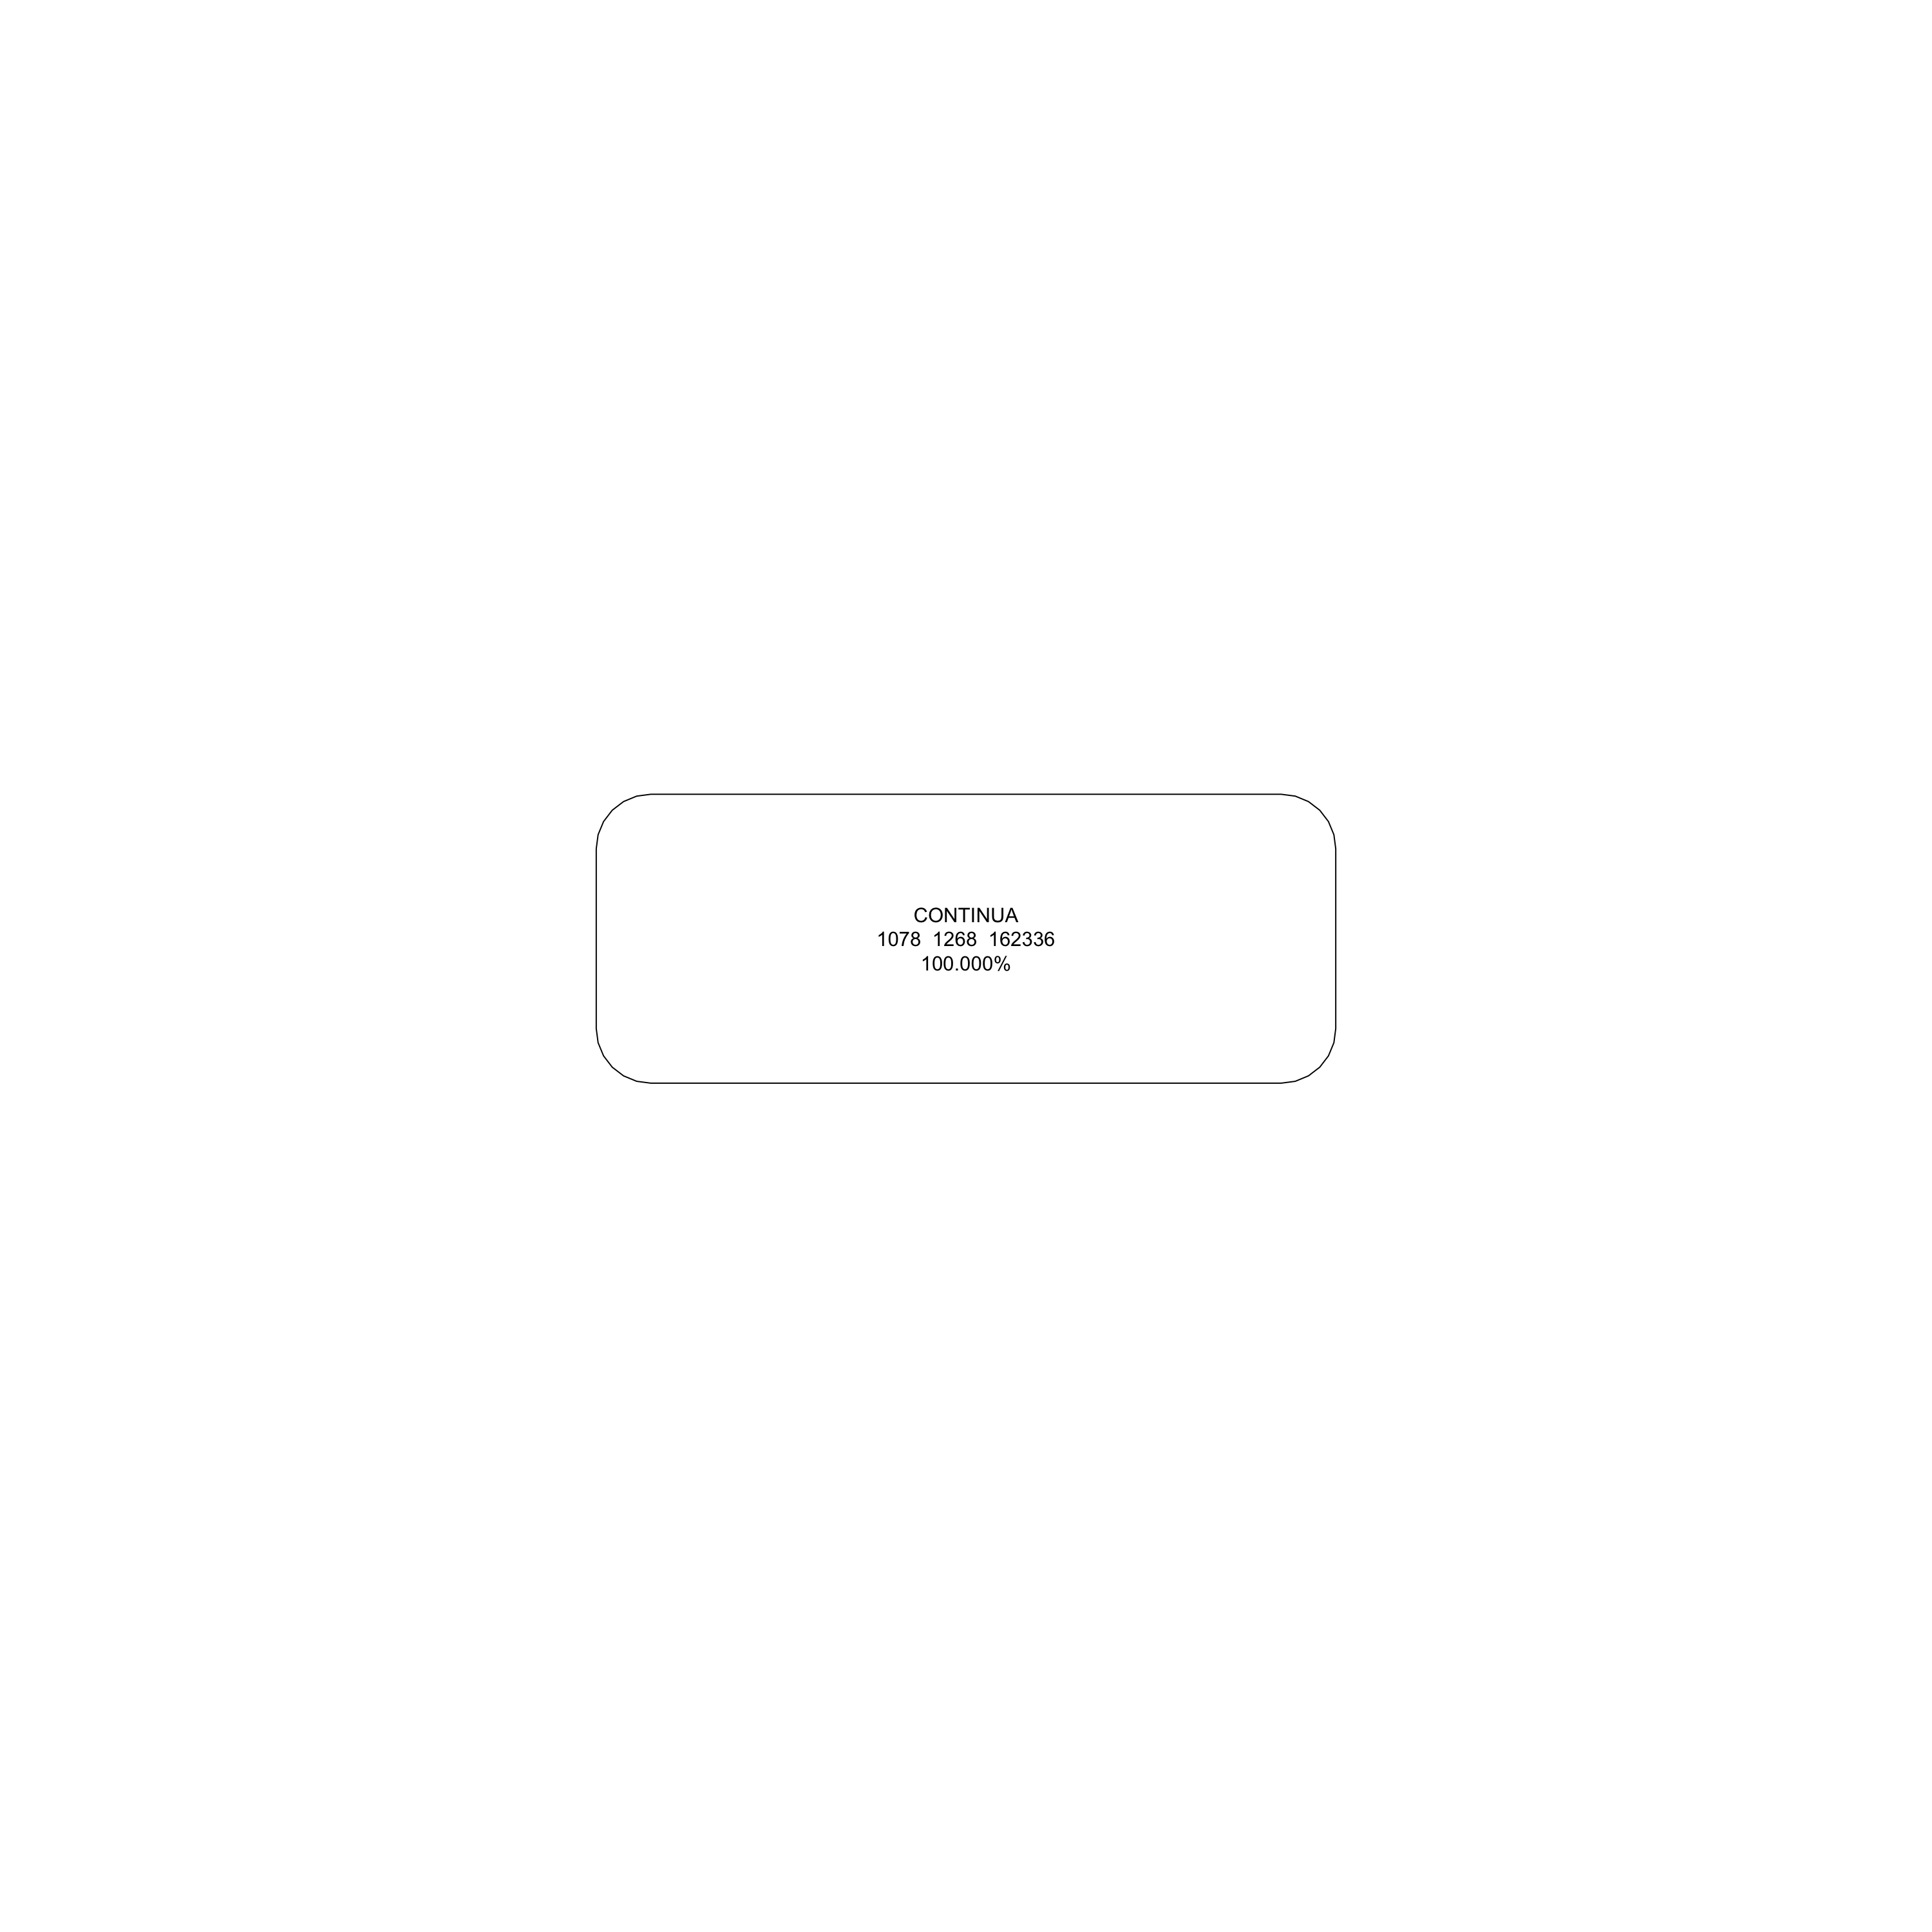

In [11]:
#genero el modelo
modelo <-  rpart(  formula= "clase_ternaria ~ ." ,
                   data= dataset[ foto_mes==202107],
                   xval= 0,
                   cp= 0.0,
                   maxdepth= 2 )

#imprimo el modelo graficamente
prp(modelo, extra=101, digits=-5, branch=1, type=4, varlen=0, faclen=0, tweak=1.3, cex=1.2)

Esperaba ver un albol de profundidad 2 sin embargo, por alguna misteriosa razón, se ha generado un arbol con un solo nodo.
<br>
Corto por lo sano,  y establezco  cp=-1  para que siempre se abra el arbol

#genero el modelo
modelo <-  rpart(  formula= "clase_ternaria ~ ." ,
                   data= dataset1,
                   xval= 0,
                   cp= -1,
                   maxdepth= 3 )

#imprimo el modelo graficamentne
prp(modelo, extra=101, digits=5, branch=1, type=4, varlen=0, faclen=0, tweak=1.3)

Warning message:
"cex and tweak both specified, applying both"


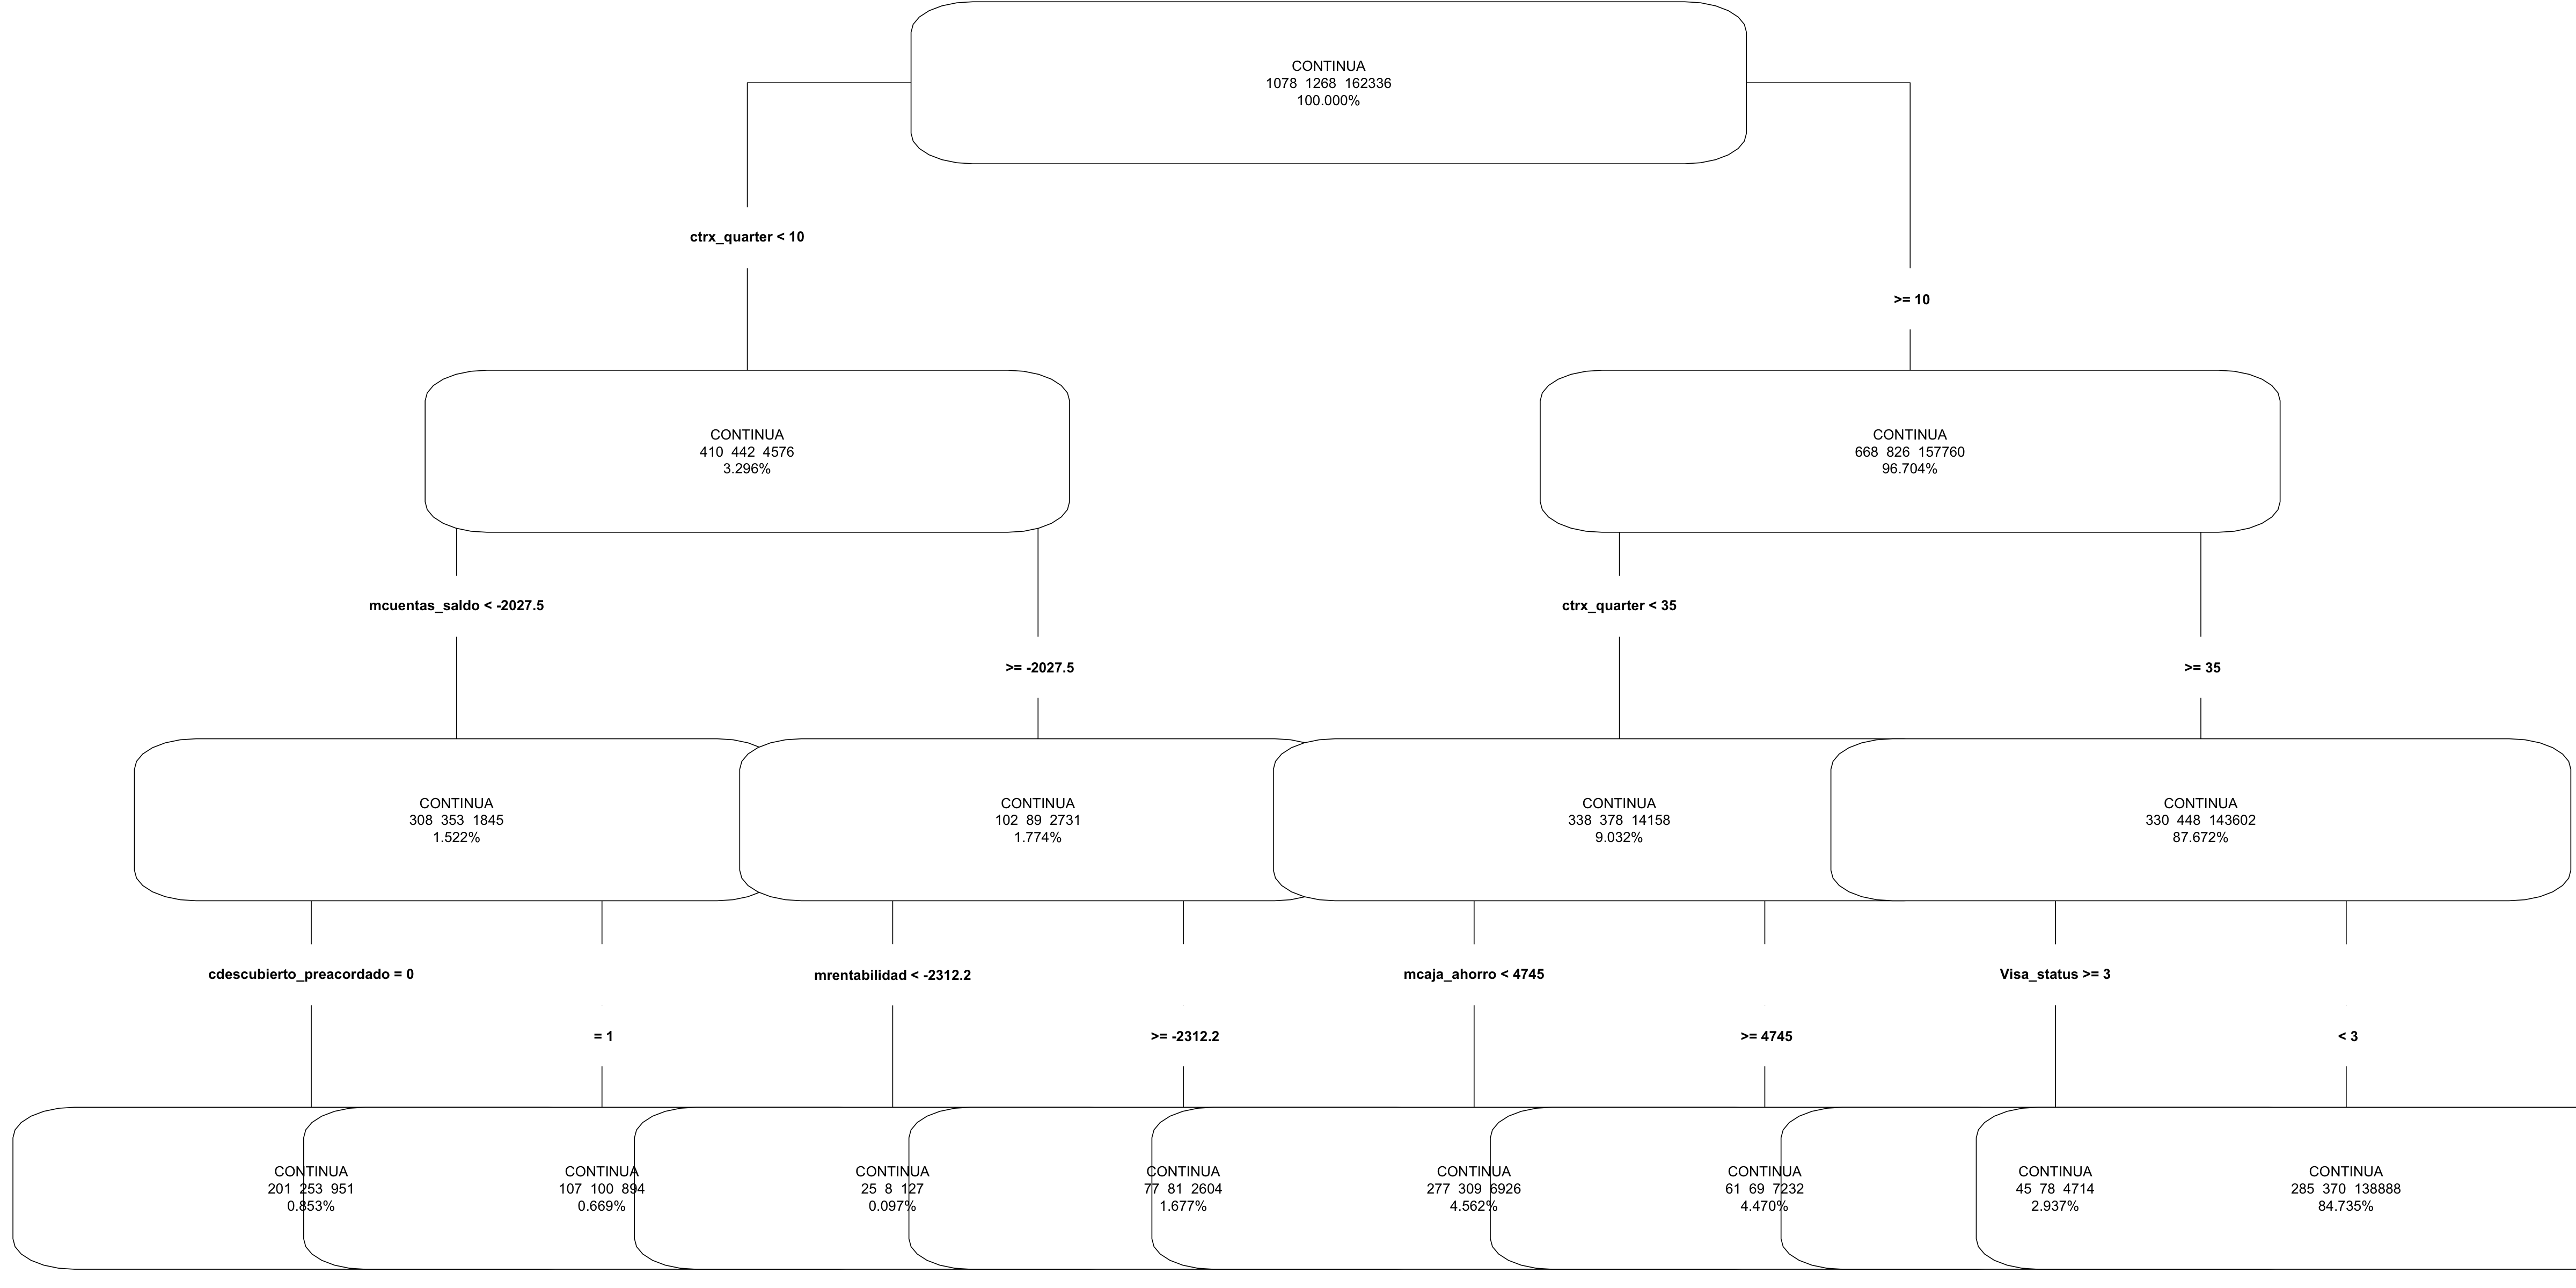

In [12]:
#genero el modelo
modelo <-  rpart(  formula= "clase_ternaria ~ ." ,
                   data= dataset[ foto_mes==202107],
                   xval= 0,
                   cp= -1,
                   maxdepth= 3 )

#imprimo el modelo graficamente
options(repr.plot.width=40, repr.plot.height=20) 
prp(modelo, extra=101, digits=-5, branch=1, type=4, varlen=0, faclen=0, tweak=1.1, cex=1.2)

Warning message:
"cex and tweak both specified, applying both"


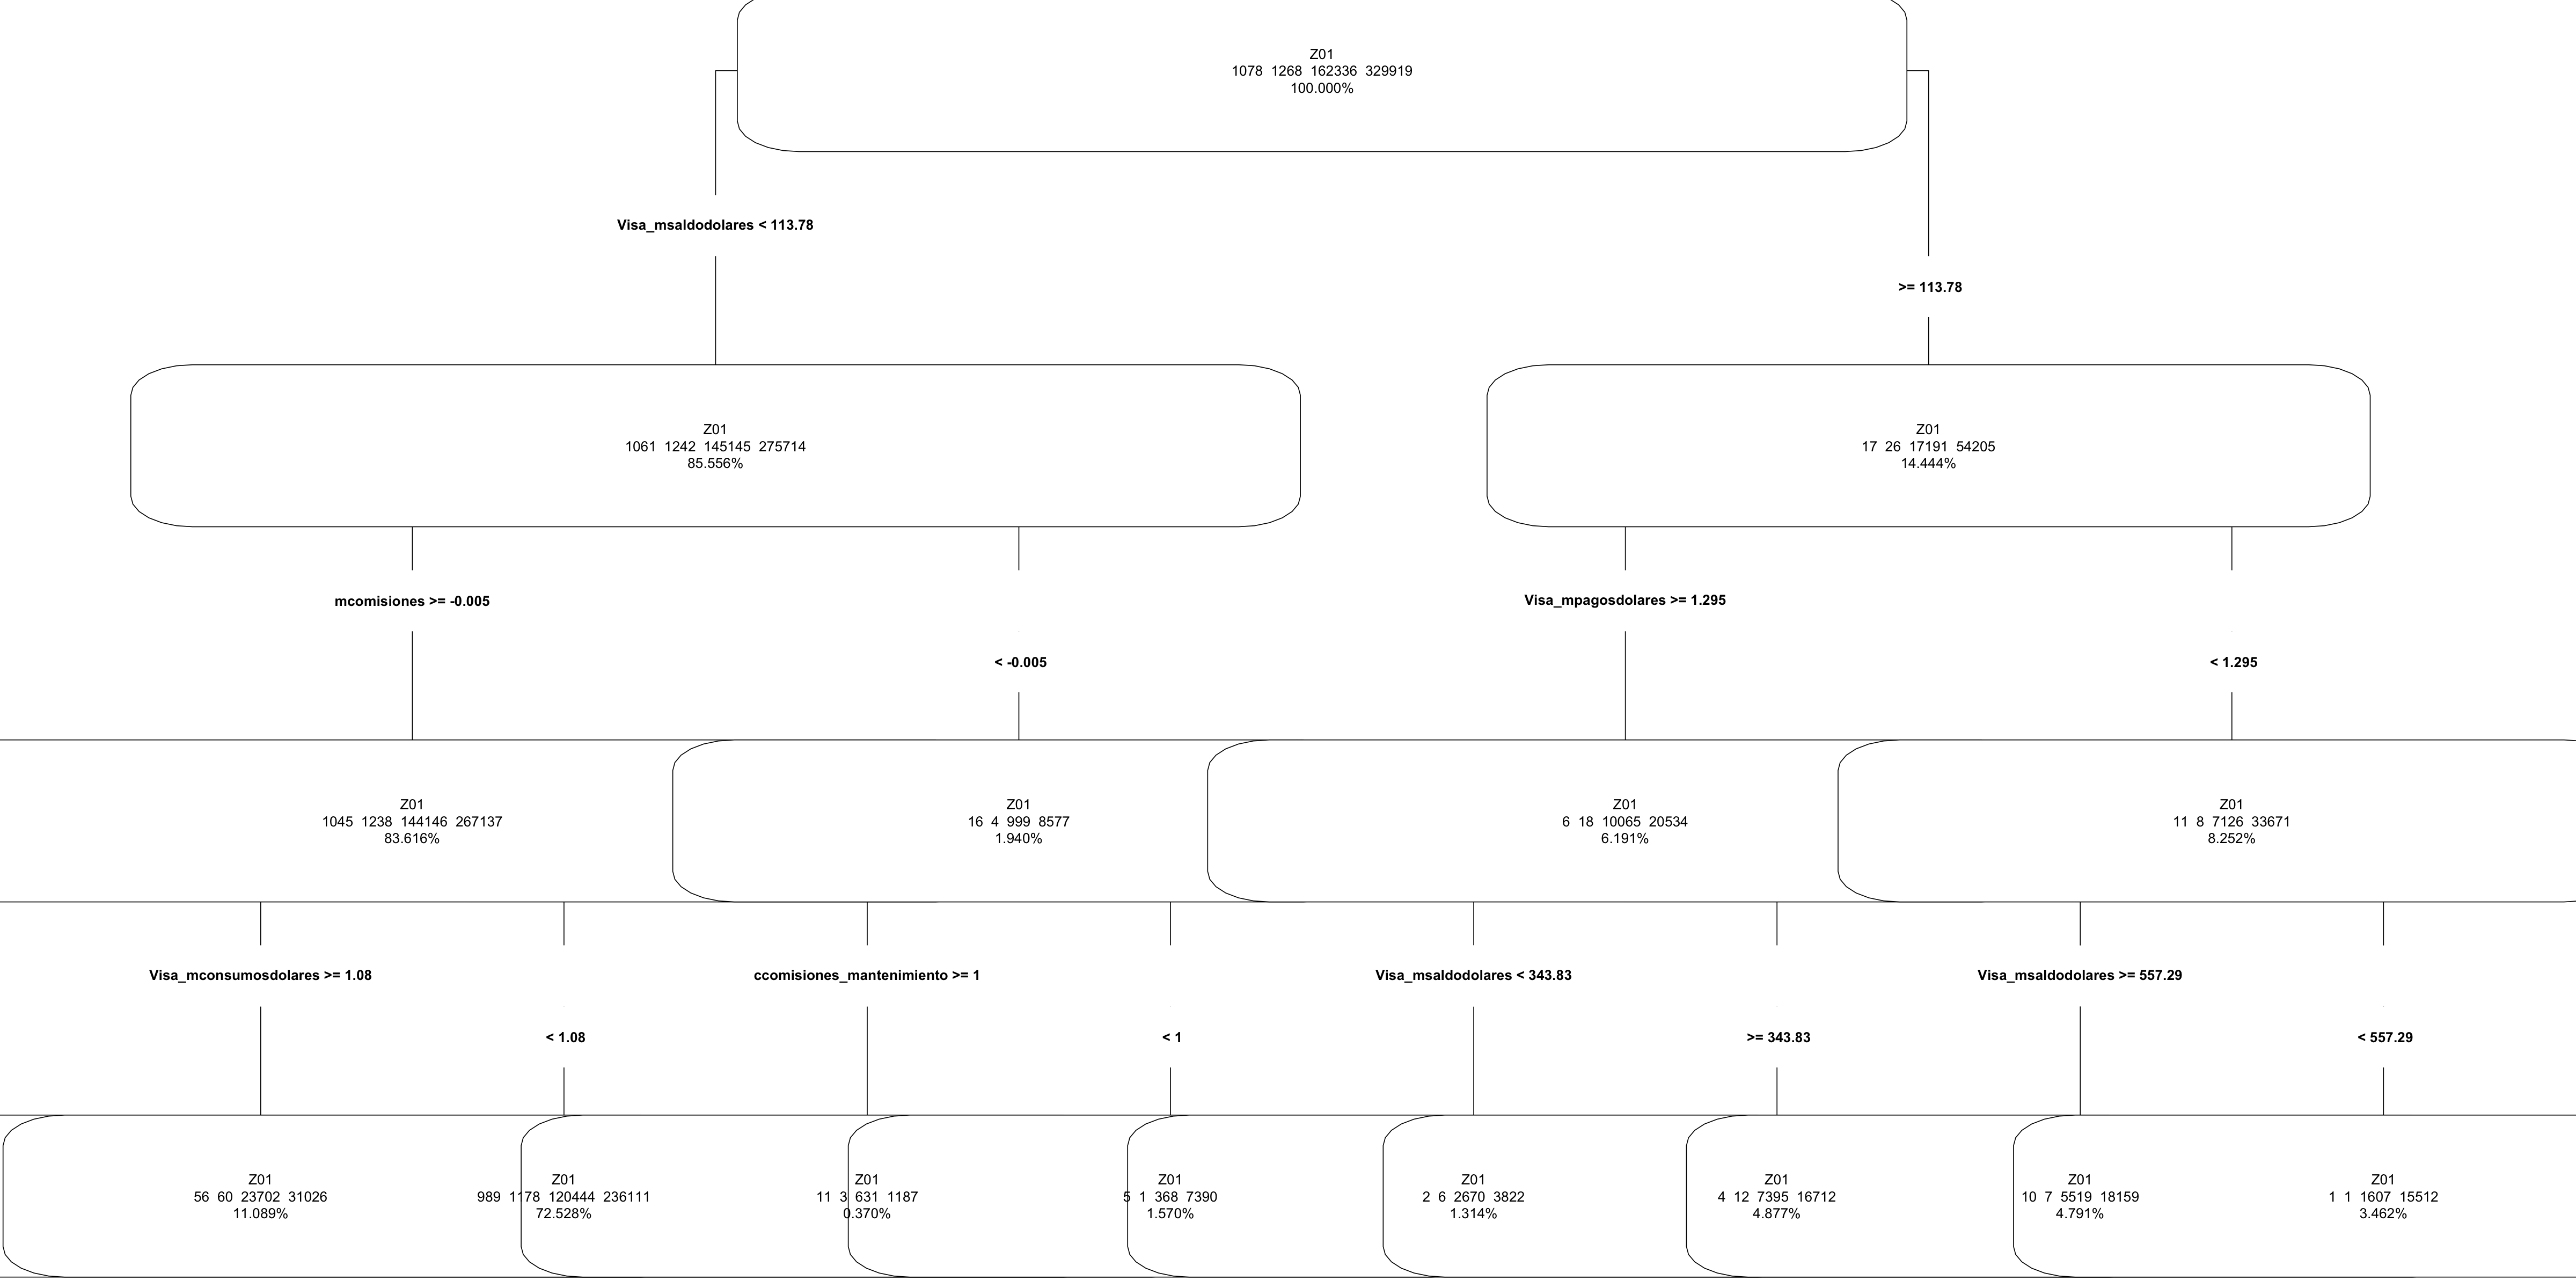

In [13]:
#genero el modelo
dataset2 <- copy( dataset )
julio <- copy( dataset[ foto_mes == 202107 ] )
dataset2[ foto_mes==202109,  clase_ternaria := "Z01" ]
julio[ , clase_ternaria := "Z01" ]
dataset2 <- rbind( dataset2,  julio )
dataset2[ , foto_mes := NULL ]
setorder( dataset2, clase_ternaria )

modelo <-  rpart(  formula= "clase_ternaria ~ . -Master_fultimo_cierre -Visa_fultimo_cierre -mcomisiones_mantenimiento" ,
                   data= dataset2,
                   xval= 0,
                   cp= -1,
                   maxdepth= 3 )

#imprimo el modelo graficamente
options(repr.plot.width=40, repr.plot.height=20) 
prp(modelo, extra=101, digits=-5, branch=1, type=4, varlen=0, faclen=0, tweak=1.1, cex=1.2)

In [14]:
modelo$splits

,count,ncat,improve,index,adj
Visa_msaldodolares,472065,-1,1385.3154330,113.780,0.0000000000
mcomisiones,494601,1,1149.2299667,-0.005,0.0000000000
mcomisiones_otras,494601,1,1146.3603172,-0.005,0.0000000000
cliente_antiguedad,494601,-1,746.5812048,326.500,0.0000000000
ctarjeta_visa_descuentos,494601,1,734.6939461,0.500,0.0000000000
mtarjeta_visa_consumo,22536,-1,0.8508489,274798.710,0.0144178950
ctarjeta_visa_debitos_automaticos,0,-1,0.8501414,17.500,0.0097425776
ctarjeta_visa_transacciones,0,-1,0.8495186,78.500,0.0056271784
Visa_mpagominimo,0,-1,0.8492559,83476.545,0.0038914319
Visa_msaldototal,0,-1,0.8492263,577878.770,0.0036954605


Significado de cada columna en la matriz:

**count**: El número de observaciones que pasaron por ese nodo.  
**ncat**: Número de categorías en la variable dividida. Un valor de -1 indica una variable numérica, mientras que un valor mayor a 1 indica una variable categórica con ese número de categorías.  
**improve**: Medida de la mejora en la impureza de Gini o en la ganancia de información después de realizar la división en ese nodo. Indica cuánto mejoró la separación de las clases después de realizar la división.  
**index**: Índice del predictor (variable) utilizado para la división en ese nodo.  
**adj**: Valor ajustado. En el contexto de los árboles de decisión, este valor generalmente se refiere a la poda del árbol.  

Cada fila de la matriz corresponde a un nodo del árbol. Por lo tanto, esta matriz muestra información sobre las divisiones realizadas en cada nodo, el número de observaciones en cada nodo y la mejora en la impureza o ganancia de información debido a esas divisiones.

### Disgresión : aprendo a borrar la memoria

Listo los objetos que estan en la memoria de R en este momento

In [15]:
ls()

[1] "dataset"  "dataset2" "julio"    "modelo"

creo una variable a ver que sucede

In [16]:
a <-  1

me vuelvo a fijar que objtetos estan en la memoria, deberia aparecer la nueva variable **a**

In [17]:
ls()

[1] "a"        "dataset"  "dataset2" "julio"    "modelo"

tal cual esperaba, aparece el nuevo objeto, la variable  **a**

Me fijo cuanta memoria esta disponible

In [18]:
gc()

,used,(Mb),gc trigger,(Mb),limit (Mb),max used,(Mb)
Ncells,781294,41.8,2258043,120.6,NA,3325097,177.6
Vcells,115204448,879.0,344498360,2628.4,32768,430465461,3284.2


Borro **TODOS** los objetos que estan en la memoria de R

In [19]:
rm( list=ls())

Me vuelvo a fijar cuanta memoria hay disponible

In [20]:
gc()

,used,(Mb),gc trigger,(Mb),limit (Mb),max used,(Mb)
Ncells,779839,41.7,2258043,120.6,NA,3325097,177.6
Vcells,1679133,12.9,275598688,2102.7,32768,430465461,3284.2


llama a **gc()** garbaje collection, que me va a liberar mas aún la memoria
<br>
https://cran.r-project.org/web/packages/profmem/vignettes/profmem.html

Ahora si, limpie bore todos los objetos de R y limpie la memoria